In [46]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [47]:
#Load the csv file you created in step 3

step3_output = pd.read_csv(r"C:/Users/Curtis/Documents/SpringboardGuidedCapstone/data/step3_output.csv")

step3_output.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
0,Hilltop Ski Area,Alaska,2090,294,0,0,0,0,0,1,...,30,30,150,36,69,30,34,152,30,2
1,Sunrise Park Resort,Arizona,11100,1800,0,0,0,1,2,3,...,800,80,115,49,250,74,78,104,80,1
2,Yosemite Ski & Snowboard Area,California,7800,600,0,0,0,0,0,1,...,88,174,110,84,300,47,47,107,0,1
3,Boreal Mountain Resort,California,7700,500,0,0,0,1,1,3,...,380,200,150,54,400,49,64,150,200,1
4,Dodge Ridge,California,8200,1600,0,0,0,0,1,2,...,862,174,115,69,350,78,78,140,0,1


In [48]:
#Create dummy variables for state. Add the dummies back to the dataframe and remove the original column for state.

dfo = pd.concat([step3_output, pd.get_dummies(step3_output['state'])], axis=1).drop(['state'], axis =1)
print(dfo.shape)
dfo.head()


(176, 60)


,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Hilltop Ski Area,2090,294,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Sunrise Park Resort,11100,1800,0,0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Yosemite Ski & Snowboard Area,7800,600,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
3,Boreal Mountain Resort,7700,500,0,0,0,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Dodge Ridge,8200,1600,0,0,0,0,1,2,5,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import explained_variance_score, mean_absolute_error

# first we import the preprocessing package from the sklearn library
from sklearn.preprocessing import StandardScaler

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = dfo.drop(columns=['Name','AdultWeekend'], axis=0)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y= dfo['AdultWeekend']
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

In [50]:
#Using sklearn model selection import train_test_split, and create a 75/25 split with the y = AdultWeekend. 
#We will start by using the adult weekend ticket price as our response variable for modeling.

# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=101)

In [53]:
#figure out the best alpha value by checking the model accuracy with setting multiple alpha values
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15]

#define Ridge model by setting alfa and fit it with x, y data. Then we check the R-squared, MSE, RMSE values for each alpha.
for a in alphas:
 model = Ridge(alpha=a, normalize=True).fit(X_train, y_train) 
 score = model.score(X_train, y_train)
 pred_y = model.predict(X_test)
 mse = mean_squared_error(y_test, pred_y) 
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))


Alpha:0.000001, R2:0.891, MSE:77.75, RMSE:8.82
Alpha:0.000010, R2:0.891, MSE:77.75, RMSE:8.82
Alpha:0.000100, R2:0.891, MSE:77.78, RMSE:8.82
Alpha:0.001000, R2:0.891, MSE:78.07, RMSE:8.84
Alpha:0.010000, R2:0.890, MSE:80.57, RMSE:8.98
Alpha:0.100000, R2:0.883, MSE:96.03, RMSE:9.80
Alpha:0.500000, R2:0.827, MSE:114.89, RMSE:10.72
Alpha:1.000000, R2:0.763, MSE:115.38, RMSE:10.74
Alpha:5.000000, R2:0.484, MSE:125.12, RMSE:11.19
Alpha:10.000000, R2:0.339, MSE:154.94, RMSE:12.45
Alpha:15.000000, R2:0.261, MSE:176.24, RMSE:13.28


In [57]:
#define the Ridge model again with alpha 0.01 values and fit it with X_train and y_train data, 
#then predict the X_test data and check the prediction accuracy

ridge_mod=Ridge(alpha=0.001, normalize=True).fit(X_train,y_train)
y_pred = ridge_mod.predict(X_test)
score = model.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse))) 
print(y_pred)

R2:0.327, MSE:78.07, RMSE:8.84
[ 77.3497481   75.76214339  40.44410792  35.49295782  55.49466406
  82.05829955  59.90347204  89.48502804  64.99416211  42.80124364
  86.98969303  87.24720065  45.18516301  58.42429414  37.81586695
  44.64554136  43.13541156  48.84274802  71.53490477  53.89832717
  61.63929757  72.23546692  62.72638952  44.30157826  69.1439963
  56.41847821  91.14194656  28.84872319  67.50886998  84.81721686
  55.4509941   44.09534753  39.15433448  78.5438362   69.15874481
 100.83693322  38.7829177   39.838543    52.61281802  65.79195027
  45.98781619  57.81631857  49.57629064  71.72882796]


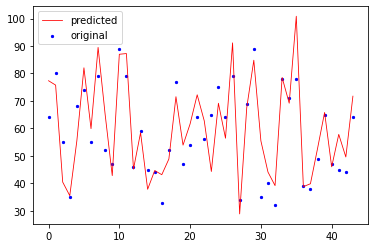

In [11]:
#visualize the result

x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()